In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

In [4]:
df = pd.read_csv('/content/drive/My Drive/Data Science Stuff/Housing Prices.csv')
df.head()

,SquareFeet,SalePrice
0,"1,710",208500
1,"1,262",181500
2,"1,786",223500
3,"1,717",140000
4,"2,198",250000


In [5]:
# replace comma to make square feet an integer
df['SquareFeet'] = df['SquareFeet'].apply(lambda s: s.replace(',','')).astype('int')

In [6]:
# Exploratory Data Analysis
df.describe()

,SquareFeet,SalePrice
count,1460.000000,1460.000000
mean,1515.463699,180921.195890
std,525.480383,79442.502883
min,334.000000,34900.000000
25%,1129.500000,129975.000000
50%,1464.000000,163000.000000
75%,1776.750000,214000.000000
max,5642.000000,755000.000000


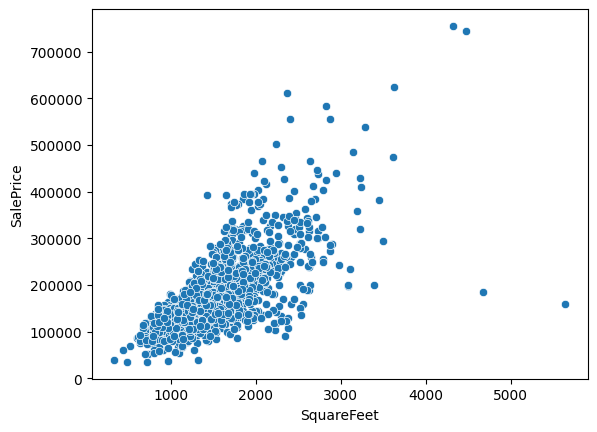

In [23]:
## relationship between square feet and saleprice - would expect it to have a positive slope
sns.scatterplot(x = 'SquareFeet', y = 'SalePrice', data = df)
plt.show()

In [33]:
# using square feet as the input variable,
X = df.iloc[:,:-1].values # get the first column in the dataframe (SquareFeet)
y = df.iloc[:,1].values # get the second column in the dataframe (SalePrice)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 19)

In [35]:
print('Train: ', X_train.shape, y_train.shape)
print('Test: ', X_test.shape, y_test.shape)

Train:  (1168, 1) (1168,)
Test:  (292, 1) (292,)


In [36]:
# use cross validation to score the model
def get_cv_scores(model):
  scores = cross_val_score(model,
                           X_train,
                           y_train,
                           cv = 10, # use 10-fold cross validation
                           scoring = 'r2') # score with r-squared
  print('CV mean: ', np.mean(scores)) # give mean of r-squared scores
  print('STD: ', np.std(scores)) # give standard deviation of r-squared scores
  print('\n')


In [37]:
# fit the model to the training data
lr = LinearRegression().fit(X_train, y_train)
# get scores from cross validation of training data
get_cv_scores(lr)

CV mean:  0.5023074646169612
STD:  0.16564720436047445




In [13]:
# view regression line information
print(lr.intercept_)
print(lr.coef_) # note the slope is positive which is what we'd expect

12068.572732874134
[112.38504499]


In [14]:
# predict the SalePrice on the test data set with the fitted model
y_pred = lr.predict(X_test)

In [44]:
[str(i) for i in np.arange(100,900,100)]
# for i in np.arange(100,900,100):
#   print(str(i))

['100', '200', '300', '400', '500', '600', '700', '800']

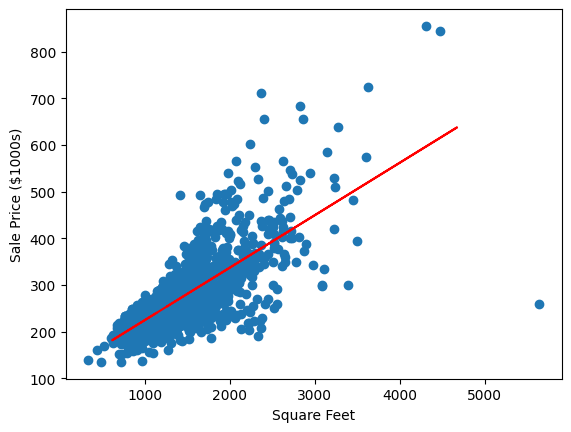

In [41]:
# plot training data
plt.scatter(X_train, y_train)
# plot predicted data
plt.plot(X_test, y_pred, color = 'r')
plt.xlabel('Square Feet')
plt.ylabel('Sale Price ($1000s)')
plt.yticks(np.arange(0,800000,100000), labels = [str(i) for i in np.arange(100,900,100)]) # change the labels on y-axis
plt.show()

In [63]:
### function to predict the price given one instance of square feet
def predict_one(sqft): # sqft = float
  pred_price = lr.predict([[sqft]]) # use model to predict the price
  print('For how {s}, the cost is predicted to be: $'.format(s = sqft), round(pred_price[0],2)) # output a readable print statement

In [64]:
## How much would a house that is 2542 square feet cost?
predict_one(2542)
predict_one(1234)
predict_one(5678)
predict_one(3764)

For square foot = 2542, the cost is predicted to be: $ 297751.36
For square foot = 1234, the cost is predicted to be: $ 150751.72
For square foot = 5678, the cost is predicted to be: $ 650190.86
For square foot = 3764, the cost is predicted to be: $ 435085.88
